In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [7]:
file = '../../../../../../dataframes/enigh/HOGARES/df_one_hot.csv'


In [8]:
df <- read.csv(file = file)
data <- df
head(data)

anio_tvd,anio_licua,anio_refri,anio_estuf,anio_lavad,anio_planc,tsalud1_h,tsalud1_m,est_alim,est_trans,⋯,alim17_12_1,alim17_12_2,alim17_12_3,alim17_12_4,alim17_12_5,alim17_12_6,alim17_12_7,acc_alim18_1,acc_alim18_2,acc_alim18_3
0.1530612,0.1010101,0.06060606,0.07070707,0.09090909,0.1414141,0,0.5084746,0.06000000,0.141129032,⋯,0,0,0,0,0,0,1,1,0,0
0.1326531,0.1111111,0.11111111,0.06060606,0.06060606,0.1111111,0,0.5084746,0.02571429,0.004032258,⋯,0,0,0,0,0,0,1,1,0,0
0.1530612,0.1414141,0.12121212,0.12121212,0.14141414,0.1414141,0,0.3389831,0.04857143,0.070564516,⋯,0,0,0,0,0,0,1,1,0,0
0.1530612,0.1212121,0.10101010,0.10101010,0.13131313,0.1515152,0,0.5084746,0.03428571,0.060483871,⋯,0,0,0,0,0,0,1,1,0,0
0.1326531,0.1414141,0.12121212,0.15151515,0.15151515,0.1313131,0,0.2542373,0.08857143,0.060483871,⋯,0,0,0,0,0,0,1,1,0,0
0.1428571,0.1313131,0.96969697,0.06060606,0.01010101,0.1111111,0,0.3389831,0.09428571,0.483870968,⋯,0,0,0,0,0,0,1,1,0,0


In [9]:
ncol(data)

[1] 272

In [10]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [11]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
anio_tvd,2.085733
anio_licua,3.033139
anio_refri,3.204282
anio_estuf,3.282109
anio_lavad,3.111690
anio_planc,2.877634


In [12]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
9,est_alim,4.319120
10,est_trans,3.310052
4,anio_estuf,3.282109
3,anio_refri,3.204282
5,anio_lavad,3.111690
2,anio_licua,3.033139


Saving 7 x 7 in image


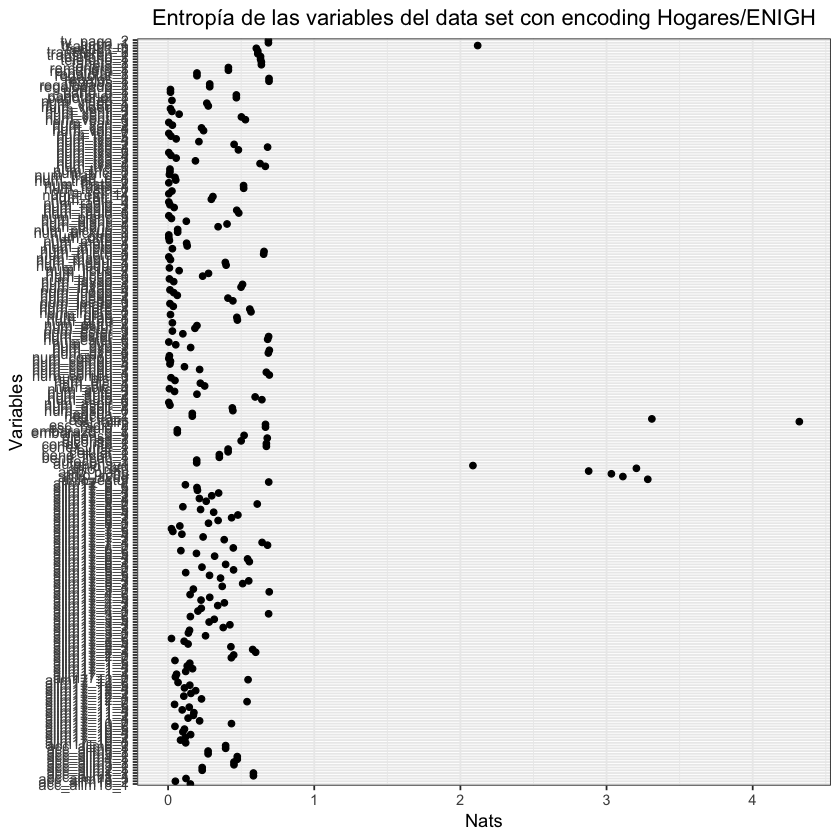

In [15]:
ggplot(df_entropy, aes(y=data_names, x=data_entropy)) + 
    theme_bw() +
    ggtitle('Entropía de las variables del data set con encoding Hogares/ENIGH') + 
    xlab('Nats') +
    ylab("Variables")+
    theme(plot.title = element_text(hjust = 0.5))+
    geom_point()+
    ggsave(filename = "../../../../../../images/enigh/HOGARES/entropy_one_hot.png", dpi = 300)


Saving 7 x 7 in image


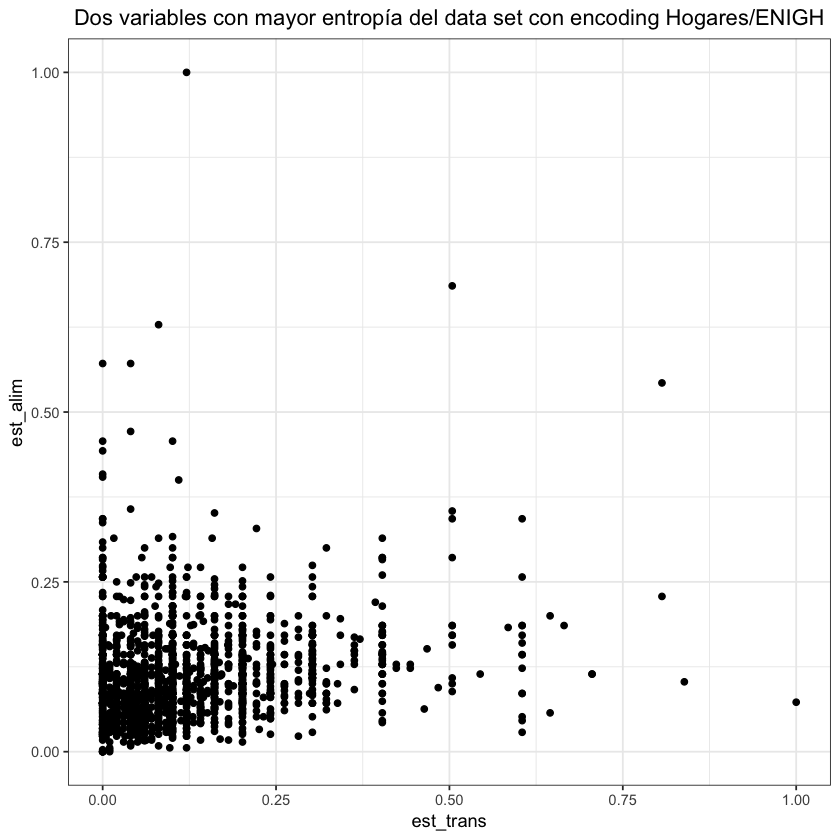

In [17]:
ggplot(data = data, 
       aes(y=data$est_alim, 
           x=data$est_trans))+
    theme_bw() +
    ggtitle('Dos variables con mayor entropía del data set con encoding Hogares/ENIGH') + 
    xlab('est_trans') +
    ylab("est_alim")+
    theme(plot.title = element_text(hjust = 0.5))+
    geom_point()+
    ggsave(filename = "../../../../../../images/enigh/HOGARES/entropy_one_hot_2_var.png", dpi = 300)


In [18]:
png("../../../../../../images/enigh/HOGARES/entropy_one_hot_3_var.png")
scatterplot3d(y=data$est_alim, 
              x=data$est_trans,
              z=data$anio_estuf, pch = 19, 
              color = "black", 
              main="Tres variables con mayor entropía del data set con encoding Hogares/ENIGH",
              xlab = 'est_alim', 
              ylab = 'est_trans',
              zlab = 'anio_estuf') 
dev.off()

pdf 
  2

In [19]:
file = '../../../../../../dataframes/enigh/HOGARES/df_entropy_one_hot.csv'

In [20]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
